In [11]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

import pandas as pd

In [4]:
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)

In [10]:
pd.DataFrame(y).value_counts()

0    985
1     15
dtype: int64

In [12]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size=0.5, random_state=2)

In [13]:
ns_prob = [0 for _ in range(len(Y_Test))]

In [14]:
model = LogisticRegression(solver="lbfgs")

In [16]:
model.fit(X_Train, Y_Train)

LogisticRegression()

In [25]:
lr_prob = model.predict_log_proba(X_Test)
lr_pred = model.predict(X_Test)

In [18]:
lr_prob = lr_prob[:, 1]

In [19]:
ns_auc = roc_auc_score(Y_Test, ns_prob)
lr_auc = roc_auc_score(Y_Test, lr_prob)

In [28]:
from sklearn.metrics import accuracy_score
print(f"No Skill: {ns_auc:.2f}")
print(f"Logisti: {lr_auc:.2f}")
print(f"ACC: {accuracy_score(Y_Test, lr_pred)}")

No Skill: 0.50
Logisti: 0.72
ACC: 0.978


In [22]:
ns_fpr, ns_tpr, _ = roc_curve(Y_Test, ns_prob)
lr_fpr, lr_tpr, _ = roc_curve(Y_Test, lr_prob)

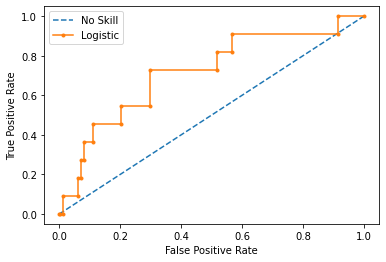

In [23]:
plt.plot(ns_fpr, ns_tpr, linestyle="--", label="No Skill")
plt.plot(lr_fpr, lr_tpr, marker=".", label="Logistic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [ ]:
# HERE WE CAN SEE THE ROC CURVE WITH A DATASET WITH 100:1 RATIO (Class 0 = 985 | Class 1 = 15)
# IT HAS SKIL BUT THAT SKILL IS MEASURED AS MAKING CORRECT TRUE NEGATIVE PREDICTIONS AND THERE ARE A LOT OF 
# NEGATIVE PREDICTIONS TO MAKE
# IF WE REVIEWS THE PREDICTIONS, WE WILL SEE THAT THE MODEL PREDICTS THE MAJORITY CLASS (Class 0) IN ALL CASES
# ON THE TEST SET. THE SCORE IS VERY MISLEADING